In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
import pickle
import os
import glob
import seaborn as sns
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn import preprocessing
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score,StratifiedKFold
import xgboost as xgb

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
i = 1
frames = []
for name in os.listdir('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'):
    extents = os.path.splitext('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'+'/{}'.format(name))[1].lower()
    if extents == '.csv':
        df= pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        frames.append(df)
        print('csv',df.shape)
    elif extents == '.xlsx':
        df= pd.read_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        df.columns = df.columns.astype(str)
        frames.append(df)
        print('xlx',df.shape)

result =  pd.concat(frames, axis=0, ignore_index= True)

csv (78, 1060)
csv (191, 1060)
csv (132, 1059)
csv (224, 1060)
csv (42, 1060)
csv (142, 1060)
csv (186, 1060)
csv (80, 1060)
csv (348, 1060)
csv (102, 1060)
csv (198, 1060)
csv (222, 1060)
csv (110, 1060)
xlx (680, 1059)
csv (250, 1060)
xlx (224, 1059)
csv (92, 1060)
csv (80, 1060)
csv (322, 1060)


In [8]:
result.head()

,,L*,a*,b*,X,Y,Z,Dominant Wavelenght,Whiteness,Purity,...,979.335,980.054,980.772,981.491,982.209,982.928,983.646,984.364,985.082,Unnamed: 1059
0,W_Calibration,100.000,0.000000,0.000000,95.0422,100.000,108.8760,565.016,99.9909,0.000017,...,100.0000,100.0000,100.000,100.0000,100.000,100.00000,100.0000,100.0000,100.0000,NaN
1,F_Calibration,100.000,0.000000,0.000000,108.1040,100.000,39.2965,491.070,99.9909,0.000170,...,100.0000,100.0000,100.000,100.0000,100.000,100.00000,100.0000,100.0000,100.0000,NaN
2,W_VK12 | 2_J_None_0.902_SI1,101.352,-1.569150,4.040870,97.4907,103.537,106.1060,570.000,86.0505,0.035779,...,106.0810,106.2960,106.206,106.8210,106.483,91.47060,120.7140,27.2222,148.3330,NaN
3,F_VK12 | 2_J_None_0.902_SI1,100.595,3.739330,-10.586200,112.2450,101.547,46.5464,575.670,140.8850,0.041247,...,62.4801,62.8836,62.791,62.8042,62.124,51.55710,38.7013,56.8270,-143.2990,NaN
4,W_3472A2 | 126_D_None_0.702_VS1,100.909,-0.104228,-0.133574,97.2349,102.371,111.6780,485.666,102.9360,0.001434,...,105.5490,105.5300,105.152,105.4080,105.341,9.87395,176.0200,70.2381,10.7143,NaN


In [9]:
result.rename(columns = {' ': 'Output'}, inplace=True)

In [10]:
result.shape

(3703, 1060)

In [11]:
result_2= result.loc[:,'356.692':'428.919']
result_2.columns

Index(['356.692', '357.472', '358.252', '359.031', '359.811', '360.59',
       '361.37', '362.149', '362.928', '363.707', '364.486', '365.266',
       '366.044', '366.823', '367.602', '368.381', '369.16', '369.938',
       '370.717', '371.496', '372.274', '373.052', '373.831', '374.609',
       '375.387', '376.165', '376.943', '377.721', '378.499', '379.277',
       '380.055', '380.833', '381.61', '382.388', '383.165', '383.943',
       '384.72', '385.498', '386.275', '387.052', '387.829', '388.606',
       '389.383', '390.16', '390.937', '391.714', '392.49', '393.267',
       '394.044', '394.82', '395.596', '396.373', '397.149', '397.925',
       '398.702', '399.478', '400.254', '401.03', '401.806', '402.581',
       '403.357', '404.133', '404.908', '405.684', '406.459', '407.235',
       '408.01', '408.786', '409.561', '410.336', '411.111', '411.886',
       '412.661', '413.436', '414.211', '414.985', '415.76', '416.535',
       '417.309', '418.084', '418.858', '419.632', '420.407', 

In [12]:
result_3 =result.loc[:,'Output']
result_2= result.loc[:,'363.707':'423.503']
result_1= result.iloc[:,1:14]


In [13]:
print(result_2.shape, result_3.shape)

(3703, 78) (3703,)


In [14]:
df = pd.concat([result_2,result_3], axis=1)
df.head()


,363.707,364.486,365.266,366.044,366.823,367.602,368.381,369.16,369.938,370.717,...,417.309,418.084,418.858,419.632,420.407,421.181,421.955,422.729,423.503,Output
0,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,W_Calibration
1,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,F_Calibration
2,87.0480,86.5098,86.2694,86.1470,85.8456,85.3556,85.0497,84.6754,84.2657,83.8722,...,78.9688,81.7693,85.1405,87.9776,89.7679,90.9776,91.9985,92.7577,93.4443,W_VK12 | 2_J_None_0.902_SI1
3,62.4444,62.0639,61.7058,61.2996,60.9179,60.5205,60.1136,59.6632,59.1972,58.7010,...,83.3894,85.9996,88.8012,91.5548,93.5495,95.8632,98.2025,100.8680,103.6550,F_VK12 | 2_J_None_0.902_SI1
4,101.9310,101.7240,101.6950,101.6310,101.6350,101.1850,101.1380,100.9720,100.8440,100.6880,...,101.6930,101.8660,102.0850,102.2610,102.3590,102.4060,102.4350,102.4410,102.4610,W_3472A2 | 126_D_None_0.702_VS1


In [15]:
# df.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/whole_data.xlsx')

In [16]:
df_without_calb = df[~df['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]
df_without_calb.reset_index()
df_without_calb['w/f']= df_without_calb['Output'].str.split('_').str[0]

In [17]:
df_without_calb.shape

(2536, 80)

In [18]:
df_with_w = df_without_calb[df_without_calb['w/f'] == 'W']


In [19]:
df_with_w['color'] = df_with_w['Output'].str.split('_').str[2]
df_with_w['color'].replace({'E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)
df_with_w['quality'] = df_with_w['Output'].str.split('_').str[3]
df_with_w['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)


In [20]:
df_without_calb['color'] = df_without_calb['Output'].str.split('_').str[2]
df_without_calb['color'].replace({'E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)
df_without_calb['quality'] = df_without_calb['Output'].str.split('_').str[3]
df_without_calb['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)

In [21]:
df_without_calbwf_None  = df_without_calb[df_without_calb['quality'] == 'None']
df_without_calbwf_faint  = df_without_calb[df_without_calb['quality'] == 'Faint']
df_without_calbwf_medium  = df_without_calb[df_without_calb['quality'] == 'Medium']
df_without_calbwf_verystroong  = df_without_calb[df_without_calb['quality'] == 'Very Strong']
df_without_calbwf_strong = df_without_calb[df_without_calb['quality'] == 'Strong']

In [22]:
# Seperating Data with quality
df_without_calb_None  = df_with_w[df_with_w['quality'] == 'None']
df_without_calb_faint  = df_with_w[df_with_w['quality'] == 'Faint']
df_without_calb_medium  = df_with_w[df_with_w['quality'] == 'Medium']
df_without_calb_verystroong  = df_with_w[df_with_w['quality'] == 'Very Strong']
df_without_calb_strong = df_with_w[df_with_w['quality'] == 'Strong']

In [23]:
(df_without_calb_None.shape,
df_without_calb_faint.shape,
df_without_calb_medium.shape,
df_without_calb_verystroong.shape,
df_without_calb_strong.shape)

((675, 82), (323, 82), (100, 82), (165, 82), (3, 82))

In [24]:
df_with_w['color'].value_counts()

G     206
D     194
F     181
E     161
I     160
H     143
J     119
K      99
M       3
J       2
Name: color, dtype: int64

In [25]:
(df_without_calb_None.shape,
df_without_calb_faint.shape,
df_without_calb_medium.shape,
df_without_calb_verystroong.shape,
df_without_calb_strong.shape)

((675, 82), (323, 82), (100, 82), (165, 82), (3, 82))

In [26]:
df_without_calb_None.head()

,363.707,364.486,365.266,366.044,366.823,367.602,368.381,369.16,369.938,370.717,...,419.632,420.407,421.181,421.955,422.729,423.503,Output,w/f,color,quality
2,87.0480,86.5098,86.2694,86.1470,85.8456,85.3556,85.0497,84.6754,84.2657,83.8722,...,87.9776,89.7679,90.9776,91.9985,92.7577,93.4443,W_VK12 | 2_J_None_0.902_SI1,W,J,None
4,101.9310,101.7240,101.6950,101.6310,101.6350,101.1850,101.1380,100.9720,100.8440,100.6880,...,102.2610,102.3590,102.4060,102.4350,102.4410,102.4610,W_3472A2 | 126_D_None_0.702_VS1,W,D,None
10,84.3379,84.2056,83.7665,83.6529,83.5457,83.4267,83.3603,83.3049,83.4896,83.2446,...,84.5448,85.3473,85.8796,86.3245,86.6741,86.9831,W_1738A2 | 107_J_LB_None_0.702_SI1,W,J,None
12,97.5362,97.5079,97.6389,97.3283,97.3299,97.1781,97.1703,97.1557,97.1037,96.7851,...,97.5015,97.8972,98.1579,98.3211,98.5120,98.6553,W_VB12 | 16_G_None_0.901_VS1,W,G,None
14,101.1990,100.7660,100.6530,100.2860,100.1440,100.1350,100.1250,100.0650,100.1640,99.9450,...,100.7780,101.0330,101.1920,101.3340,101.4810,101.5450,W_3498A2 | 156_E_None_0.702_SI1,W,E,None


In [27]:
df_without_calbwf_None.drop(columns=['Output','w/f','quality'], inplace=True)

In [28]:
df_without_calb_None.drop(columns=['Output','w/f','quality'], inplace=True)

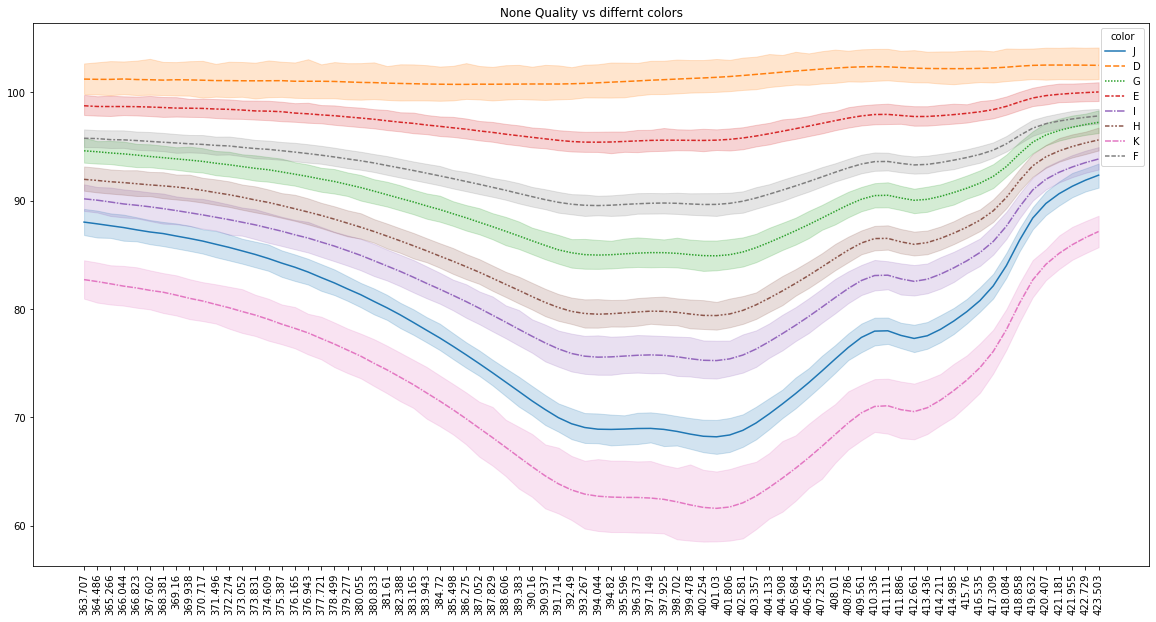

In [29]:
plt.figure(figsize=(20,10))
data1 = df_without_calb_None.set_index(["color"]).T
g1 = sns.lineplot(data=data1)
# g1.set(xticklabels=[data1.columns])
g1.set_title('None Quality vs differnt colors')
plt.xticks(rotation = 90)
plt.show()


In [30]:
X = df_without_calb_None.iloc[:,:-1]
X

,363.707,364.486,365.266,366.044,366.823,367.602,368.381,369.16,369.938,370.717,...,416.535,417.309,418.084,418.858,419.632,420.407,421.181,421.955,422.729,423.503
2,87.0480,86.5098,86.2694,86.1470,85.8456,85.3556,85.0497,84.6754,84.2657,83.8722,...,76.9752,78.9688,81.7693,85.1405,87.9776,89.7679,90.9776,91.9985,92.7577,93.4443
4,101.9310,101.7240,101.6950,101.6310,101.6350,101.1850,101.1380,100.9720,100.8440,100.6880,...,101.6090,101.6930,101.8660,102.0850,102.2610,102.3590,102.4060,102.4350,102.4410,102.4610
10,84.3379,84.2056,83.7665,83.6529,83.5457,83.4267,83.3603,83.3049,83.4896,83.2446,...,79.3827,80.2418,81.5837,83.2302,84.5448,85.3473,85.8796,86.3245,86.6741,86.9831
12,97.5362,97.5079,97.6389,97.3283,97.3299,97.1781,97.1703,97.1557,97.1037,96.7851,...,95.0697,95.4676,96.0994,96.9004,97.5015,97.8972,98.1579,98.3211,98.5120,98.6553
14,101.1990,100.7660,100.6530,100.2860,100.1440,100.1350,100.1250,100.0650,100.1640,99.9450,...,99.4006,99.6418,99.9973,100.4380,100.7780,101.0330,101.1920,101.3340,101.4810,101.5450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,94.4205,94.2624,93.8681,93.7702,93.5404,93.5409,93.3745,92.9967,93.0088,93.0037,...,90.4238,91.1620,92.2746,93.7881,95.2660,96.1081,96.6371,97.0081,97.3124,97.5169
3687,101.3850,101.4830,101.0070,100.9190,100.5780,100.6670,100.7650,100.2650,100.3160,100.3940,...,100.5690,100.7970,101.1580,101.5880,102.0450,102.2910,102.4290,102.5290,102.5930,102.6540
3693,93.9452,94.0497,94.0203,93.7596,93.5238,93.6321,93.5056,93.6082,93.2678,92.8370,...,91.4181,92.0008,92.8781,94.1325,95.2535,95.9304,96.3158,96.6242,96.8744,97.0443
3697,97.0201,96.9197,96.9904,96.5970,96.2929,96.4092,96.1082,96.2443,96.5651,96.7197,...,96.2786,96.3889,96.5597,96.8134,97.0195,97.1187,97.2012,97.3093,97.3670,97.4513


In [31]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
x_norm = pd.DataFrame(np_scaled, columns = X.columns)

In [43]:
x = x_norm.iloc[:,:-1]
Y = df_without_calb_None.iloc[:,-1]
Y

2       J
4       D
10      J
12      G
14      E
       ..
3685    G
3687    E
3693    G
3697    D
3699    D
Name: color, Length: 675, dtype: object

In [33]:
balanced = class_weight.compute_class_weight(class_weight='balanced', classes=df_without_calb_None['color'].value_counts().keys(),y=Y)
balanced = dict(zip(df_without_calb_None['color'].value_counts().keys(),balanced))
balanced

{'G': 0.6643700787401575,
 'D': 0.7273706896551724,
 'F': 0.7740825688073395,
 'E': 0.9698275862068966,
 'I': 1.016566265060241,
 'H': 1.0817307692307692,
 'J': 2.057926829268293,
 'K': 2.4816176470588234}

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(x,Y, test_size = 0.2, random_state =42, stratify = Y)

In [35]:
stratifiedkf=StratifiedKFold(n_splits=5)


In [36]:
light_gb_classifier = lgb.LGBMClassifier()
grid_values = {'n_estimators':[*range(50, 500, 20)], 'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
boost_classifier = RandomizedSearchCV(light_gb_classifier, param_distributions= grid_values , cv = stratifiedkf)

In [37]:
decision_classifier = DecisionTreeClassifier()
grid_values = {'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
decision_tree_classifier = RandomizedSearchCV(decision_classifier, param_distributions= grid_values , cv = 5)

In [38]:
forest_classifier = RandomForestClassifier(class_weight = balanced)
grid_values = {'n_estimators':[*range(50, 500, 20)], 'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
random_classifier = RandomizedSearchCV(forest_classifier, param_distributions= grid_values , cv = stratifiedkf)

In [39]:
boost_classfier_ = GradientBoostingClassifier()
grid_values = {'n_estimators':[*range(50, 500, 20)], 'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
boost_classifier = RandomizedSearchCV(boost_classfier_, param_distributions= grid_values , cv = stratifiedkf)
# score=cross_val_scoreida(logreg,X,Y,cv=stratifiedkf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Valtion score :{}".format(score.mean()))

In [40]:
boost_classfier_ = xgb.XGBClassifier(enabale_categorical = True)
grid_values = {'n_estimators':[*range(50, 500, 20)], 'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
xgboost_classifier = RandomizedSearchCV(boost_classfier_, param_distributions= grid_values , cv = stratifiedkf)
# score=cross_val_scoreida(logreg,X,Y,cv=stratifiedkf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Valtion score :{}".format(score.mean()))

In [41]:
pickle.dump(random_classifier, open('/home/pankaj_v/Documents/Data_analysis_dixit/Models/random_forest_model.pkl', 'wb'))

In [42]:
clf = xgboost_classifier.fit(X_train, Y_train)


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pankaj_v/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pankaj_v/anaconda3/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/home/pankaj_v/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7], got ['D' 'E' 'F' 'G' 'H' 'I' 'J' 'K']


In [ ]:
pickle_model = pickle.load(open('/home/pankaj_v/Documents/Data_analysis_dixit/Models/lgb_model.pkl','rb'))

In [ ]:
clf.best_params_

{'n_estimators': 450,
 'min_samples_split': 0.30000000000000004,
 'min_samples_leaf': 0.1,
 'max_features': 69,
 'max_depth': 7}

In [ ]:
clf_new = clf.best_estimator_

In [ ]:
clf_new.feature_importances_

NameError: name 'clf_new' is not defined

In [ ]:
train_preds = clf_new.predict(X_train)
test_preds = clf_new.predict(X_test)

In [ ]:
pd.DataFrame(clf.cv_results_).iloc[:,9:]

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.324074,0.314815,0.314815,0.351852,0.324074,0.325926,0.013608,6
1,0.361111,0.407407,0.425926,0.407407,0.370370,0.394444,0.024568,2
2,0.435185,0.425926,0.388889,0.527778,0.398148,0.435185,0.049344,1
3,0.324074,0.324074,0.314815,0.324074,0.324074,0.322222,0.003704,7
4,0.324074,0.342593,0.333333,0.342593,0.305556,0.329630,0.013858,5
5,0.305556,0.296296,0.277778,0.324074,0.305556,0.301852,0.015045,9
6,0.361111,0.333333,0.324074,0.379630,0.351852,0.350000,0.019772,3
7,0.324074,0.342593,0.333333,0.342593,0.324074,0.333333,0.008282,4
8,0.305556,0.296296,0.277778,0.324074,0.305556,0.301852,0.015045,9
9,0.342593,0.287037,0.268519,0.361111,0.342593,0.320370,0.035909,8


In [ ]:
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           D       0.67      0.90      0.77        93
           E       0.49      0.39      0.43        70
           F       0.55      0.59      0.57        87
           G       0.64      0.43      0.51       102
           H       0.38      0.53      0.44        62
           I       0.55      0.09      0.16        66
           J       0.27      0.12      0.17        33
           K       0.31      0.96      0.47        27

    accuracy                           0.51       540
   macro avg       0.48      0.50      0.44       540
weighted avg       0.53      0.51      0.48       540



In [ ]:
print(classification_report(Y_test, test_preds))


              precision    recall  f1-score   support

           D       0.64      0.91      0.75        23
           E       0.38      0.29      0.33        17
           F       0.52      0.50      0.51        22
           G       0.44      0.28      0.34        25
           H       0.29      0.44      0.35        16
           I       0.50      0.06      0.11        17
           J       0.33      0.12      0.18         8
           K       0.26      0.86      0.40         7

    accuracy                           0.44       135
   macro avg       0.42      0.43      0.37       135
weighted avg       0.45      0.44      0.40       135



In [ ]:
print(round(accuracy_score(Y_test, test_preds)*100,2))

86.76


In [ ]:
confusion_matrix(Y_test, test_preds)


array([[21,  1,  1,  0,  0,  0,  0,  0],
       [ 6,  7,  3,  1,  0,  0,  0,  0],
       [ 2,  4, 13,  2,  0,  1,  0,  0],
       [ 3,  1,  2, 11,  3,  4,  1,  0],
       [ 0,  0,  0,  8,  6,  2,  0,  0],
       [ 0,  0,  1,  1,  4,  9,  2,  0],
       [ 0,  0,  0,  0,  1,  0,  3,  4],
       [ 0,  0,  0,  0,  0,  1,  1,  5]])